# Data labelling (part 2, version 1)

The second version of labelling we decided to label the data according to the changes in turnover as following:
- yearly turnover growth has to be at least 20% (eq 5% in average of the quarter)
- the continuous average annual employment growth rate (CGR) has to be in TOP 10% of the companies
- the absolute change in the number of employees has to be more than 10 and CGR has to be more (or equal than 2 times E(beg) - the number of employees in the beginning)
- turnover per employee has to be in the TOP 10% of the companies

In order to use 3 classes we decided, that if company matches all 4 categories, it is considered as growing, none of them as failing and all other companies as stable

In [64]:
# Import libraries

import numpy as np
import pandas as pd

In [65]:
# Load data

df = pd.read_csv('./data/dataframes/labelled/full_period_unlabeled.csv')
df.head()

,Unnamed: 0,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE
0,0,10000024,1,12126.74,11533.92,51486.75,9.0,2017_1,5811.0,8.0,1990-07-17,1,51486.75,2.74,23660.66,23660.66,0.00,5720.75,0.015141,3.0
1,1,10000024,1,8484.90,7931.42,59869.39,8.0,2017_2,5811.0,8.0,1990-07-17,1,111356.14,5.92,16416.32,40076.98,0.16,7483.67,0.015141,3.0
2,2,10000024,1,10468.75,10068.65,55895.57,8.0,2017_3,5811.0,8.0,1990-07-17,1,167251.71,8.89,20537.40,60614.38,-0.07,6986.95,0.015141,3.0
3,3,10000024,1,7887.05,7751.34,57334.79,9.0,2017_4,5811.0,8.0,1990-07-17,1,224586.50,11.93,15638.39,76252.77,0.03,6370.53,0.015141,3.0
4,4,10000024,1,9320.26,8757.33,59484.22,10.0,2018_1,5811.0,8.0,1990-07-17,1,284070.72,15.09,18077.59,94330.36,0.04,5948.42,0.015141,3.0


In [66]:
df.shape

(1617211, 20)

In [67]:
df = df.drop('Unnamed: 0', axis=1)
df.reset_index(drop=True)
df.head()

,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE
0,10000024,1,12126.74,11533.92,51486.75,9.0,2017_1,5811.0,8.0,1990-07-17,1,51486.75,2.74,23660.66,23660.66,0.00,5720.75,0.015141,3.0
1,10000024,1,8484.90,7931.42,59869.39,8.0,2017_2,5811.0,8.0,1990-07-17,1,111356.14,5.92,16416.32,40076.98,0.16,7483.67,0.015141,3.0
2,10000024,1,10468.75,10068.65,55895.57,8.0,2017_3,5811.0,8.0,1990-07-17,1,167251.71,8.89,20537.40,60614.38,-0.07,6986.95,0.015141,3.0
3,10000024,1,7887.05,7751.34,57334.79,9.0,2017_4,5811.0,8.0,1990-07-17,1,224586.50,11.93,15638.39,76252.77,0.03,6370.53,0.015141,3.0
4,10000024,1,9320.26,8757.33,59484.22,10.0,2018_1,5811.0,8.0,1990-07-17,1,284070.72,15.09,18077.59,94330.36,0.04,5948.42,0.015141,3.0


In [68]:
df.shape

(1617211, 19)

In [69]:
# Create list of companies CGR in TOP 10%
df_cgr_top = df[['Registration_number', 'emp_growth_rate_CGR']].copy(deep=True)
df_cgr_top = df_cgr_top.drop_duplicates(keep='first')
top = int(round(df_cgr_top.shape[0] * 0.1, 0))
df_cgr_top = df_cgr_top.sort_values(by='emp_growth_rate_CGR', ascending=False).head(top)
df_cgr_top = df_cgr_top.reset_index(drop=True)
df_cgr_top = df_cgr_top.drop('emp_growth_rate_CGR', axis=1)
df_cgr_top.head()

,Registration_number
0,14529365
1,14867010
2,16071924
3,14166980
4,14771698


In [70]:
df_cgr_top.shape

(10878, 1)

In [71]:
# Create list of TOP 10% of companies by profit_per_employee
df_ppe_top = df[['Registration_number', 'emp_growth_rate_CGR']].copy(deep=True)
df_ppe_top = df_ppe_top.drop_duplicates(keep='first')
df_ppe_top = df_ppe_top.sort_values(by='emp_growth_rate_CGR', ascending=False).head(top)
df_ppe_top = df_ppe_top.reset_index(drop=True)
df_ppe_top = df_ppe_top.drop('emp_growth_rate_CGR', axis=1)
df_ppe_top.head()

,Registration_number
0,14529365
1,14867010
2,16071924
3,14166980
4,14771698


In [72]:
df_ppe_top.shape

(10878, 1)

In [73]:
# Define labelling function

def add_labels(g, reg):

    ex_df = pd.DataFrame(g).reset_index()
    classifier = 0
    E_end = list(ex_df['number_of_employees'])[-1]

    # condition 1
    mean_growth = ex_df['revenue_growth'].mean()
    if mean_growth > 5:
        classifier += 1

    # condition 2
    if reg in df_cgr_top.values:
        classifier += 1

    # condition 3
    if ex_df['ACE'].mean() > 10 and E_end * 2 >= ex_df['emp_growth_rate_CGR'].mean():
        classifier += 1

    # condition 4
    if reg in df_ppe_top.values:
        classifier += 1

    # add label according to contitions met
    if classifier == 4:
        ex_df['label'] = 'growing'
    elif classifier == 0:
        ex_df['label'] = 'failing'
    else:
        ex_df['label'] = 'stable'

    return ex_df


In [74]:
# Label the data
df_labelled = df.groupby("Registration_number").apply(lambda x: add_labels(x, x.name)).reset_index(drop=True)

In [75]:
df_labelled = df_labelled.drop('index', axis=1)
df_labelled.reset_index(drop=True, inplace=True)
df_labelled.head()

,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE,label
0,10000024,1,12126.74,11533.92,51486.75,9.0,2017_1,5811.0,8.0,1990-07-17,1,51486.75,2.74,23660.66,23660.66,0.00,5720.75,0.015141,3.0,failing
1,10000024,1,8484.90,7931.42,59869.39,8.0,2017_2,5811.0,8.0,1990-07-17,1,111356.14,5.92,16416.32,40076.98,0.16,7483.67,0.015141,3.0,failing
2,10000024,1,10468.75,10068.65,55895.57,8.0,2017_3,5811.0,8.0,1990-07-17,1,167251.71,8.89,20537.40,60614.38,-0.07,6986.95,0.015141,3.0,failing
3,10000024,1,7887.05,7751.34,57334.79,9.0,2017_4,5811.0,8.0,1990-07-17,1,224586.50,11.93,15638.39,76252.77,0.03,6370.53,0.015141,3.0,failing
4,10000024,1,9320.26,8757.33,59484.22,10.0,2018_1,5811.0,8.0,1990-07-17,1,284070.72,15.09,18077.59,94330.36,0.04,5948.42,0.015141,3.0,failing


In [76]:
# Counting how much we have in each class

df_companies = df_labelled.groupby('label').count()
df_companies = df_companies.iloc[:,0:1]
df_companies.head()

,Registration_number
label,
failing,949157
growing,2911
stable,665143


In [79]:
df_labelled.shape

(1617211, 20)

In [93]:
# Get a list of unique companies
df_companies_list = df_labelled.drop_duplicates('Registration_number')
df_companies_list.shape

(108784, 20)

In [95]:
df_label_statistics = df_companies_list.groupby('label').count()
df_label_statistics = df_label_statistics.iloc[:,0:1]
df_label_statistics

,Registration_number
label,
failing,63306
growing,213
stable,45265


(0.0, 65.0)

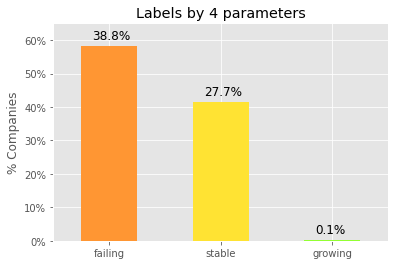

In [110]:
# Print company distribution graph
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
plt.style.use('ggplot')

colors = [ '#FF9633','#FFE333', '#93FF33']
ax = (df_companies_list['label'].value_counts()*100.0 /len(df_companies_list)).plot(kind='bar',
                                                                stacked = True,
                                                                rot = 0,
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Companies')
#ax.set_xlabel('Label')
ax.set_ylabel('% Companies')
ax.set_title('Labels by 4 parameters')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.1, i.get_height()+2, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')

# change axe margins
ax = plt.gca()
ax.set_ylim([0, 65])

In [37]:
# Splitting by timeframe and saving data

df_labelled.to_csv('./data/dataframes/full_period_labeled_v2.csv')

In [38]:
# Filter out data that is before 1st quarter of 2020

df_before = df_labelled.copy(deep=True)

In [39]:
df_before = df_before.loc[df_before.apply(lambda x: x.year_quarter in ['2017_1', '2017_2', '2017_3', '2017_4', '2018_1', '2018_2', '2018_3', '2018_4', '2019_1', '2019_2', '2019_3', '2019_4', '2020_1'], axis=1)]

In [40]:
df_before.head()

,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE,label
0,10000024,1,12126.74,11533.92,51486.75,9.0,2017_1,5811.0,8.0,1990-07-17,1,51486.75,2.74,23660.66,23660.66,0.00,5720.75,0.015141,3.0,failing
1,10000024,1,8484.90,7931.42,59869.39,8.0,2017_2,5811.0,8.0,1990-07-17,1,111356.14,5.92,16416.32,40076.98,0.16,7483.67,0.015141,3.0,failing
2,10000024,1,10468.75,10068.65,55895.57,8.0,2017_3,5811.0,8.0,1990-07-17,1,167251.71,8.89,20537.40,60614.38,-0.07,6986.95,0.015141,3.0,failing
3,10000024,1,7887.05,7751.34,57334.79,9.0,2017_4,5811.0,8.0,1990-07-17,1,224586.50,11.93,15638.39,76252.77,0.03,6370.53,0.015141,3.0,failing
4,10000024,1,9320.26,8757.33,59484.22,10.0,2018_1,5811.0,8.0,1990-07-17,1,284070.72,15.09,18077.59,94330.36,0.04,5948.42,0.015141,3.0,failing


In [41]:
df_before.shape

(1069895, 20)

In [42]:
# Save acquired data into a csv

df_before.to_csv("./data/dataframes/before_covid_labelled_v2.csv", index=False)

In [43]:
# Filter out data that is since 2nd quarter of 2020

df_during = df_labelled.copy(deep=True)

In [44]:
df_during = df_during.loc[df_during.apply(lambda x: x.year_quarter in ['2020_2', '2020_3', '2020_4', '2021_1', '2021_2', '2021_3'], axis=1)]

In [45]:
df_during.head()

,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE,label
13,10000024,1,18474.78,10983.73,137159.52,9.0,2020_2,5811.0,8.0,1990-07-17,1,1179457.60,62.67,29458.51,350586.87,0.06,15239.95,0.015141,3.0,failing
14,10000024,1,18969.94,14565.42,107660.58,10.0,2020_3,5811.0,8.0,1990-07-17,1,1287118.18,68.39,33535.36,384122.23,-0.22,10766.06,0.015141,3.0,failing
15,10000024,1,20981.29,15506.56,147818.28,10.0,2020_4,5811.0,8.0,1990-07-17,1,1434936.46,76.25,36487.85,420610.08,0.37,14781.83,0.015141,3.0,failing
16,10000024,1,22353.85,18034.91,140346.67,11.0,2021_1,5811.0,8.0,1990-07-17,1,1575283.13,83.71,40388.76,460998.84,-0.05,12758.79,0.015141,3.0,failing
17,10000024,1,19685.75,18454.83,162231.81,12.0,2021_2,5811.0,8.0,1990-07-17,1,1737514.94,92.33,38140.58,499139.42,0.16,13519.32,0.015141,3.0,failing


In [46]:
df_during.shape

(547316, 20)

In [47]:
# Save acquired data into a csv

df_during.to_csv("./data/dataframes/during_covid_labelled_v2.csv", index=False)

In [48]:
# View best performers

df_review = df_labelled[df_labelled['label']=='growing']

In [53]:
df_review.Registration_number.unique()

array([10002394, 10045653, 10242313, 10261888, 10333501, 10335003,
       10541122, 10629868, 10708409, 10817713, 10827153, 10842177,
       10861909, 10903973, 10926454, 10941086, 10964710, 11168854,
       11250958, 11474646, 11481209, 11517634, 11663152, 11668037,
       11724994, 11894130, 11935774, 12083348, 12182222, 12207226,
       12223685, 12248780, 12271537, 12308234, 12309915, 12315753,
       12330211, 12334812, 12339620, 12378198, 12383236, 12391997,
       12441488, 12449797, 12473809, 12535031, 12552561, 12593212,
       12600283, 12638966, 12649579, 12667399, 12680371, 12734109,
       12755442, 12759598, 12798799, 12800510, 12824077, 12847026,
       12853191, 12858159, 12869341, 12871869, 12876200, 12879718,
       12916046, 12916617, 12918045, 12918157, 12931206, 12932789,
       12963593, 12973469, 12982161, 12989482, 12993265, 14021307,
       14024257, 14027391, 14032953, 14034801, 14047399, 14069314,
       14082314, 14083231, 14094795, 14103554, 14110442, 14114

In [54]:
df_review.head()

,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE,label
971,10002394,1,23838.37,25035.72,235898.93,11.0,2017_1,5911.0,8.0,1995-11-16,1,235898.93,1.03,48874.09,48874.09,0.00,21445.36,0.04321,14.0,growing
972,10002394,1,54916.22,38283.22,236399.19,11.0,2017_2,5911.0,8.0,1995-11-16,1,472298.12,2.07,93199.44,142073.53,0.00,21490.84,0.04321,14.0,growing
973,10002394,1,42641.80,45156.59,193430.82,12.0,2017_3,5911.0,8.0,1995-11-16,1,665728.94,2.91,87798.39,229871.92,-0.18,16119.24,0.04321,14.0,growing
974,10002394,1,47919.49,49831.88,174620.46,11.0,2017_4,5911.0,8.0,1995-11-16,1,840349.40,3.68,97751.37,327623.29,-0.10,15874.59,0.04321,14.0,growing
975,10002394,1,53800.33,37668.69,604322.82,11.0,2018_1,5911.0,8.0,1995-11-16,1,1444672.22,6.32,91469.02,419092.31,2.46,54938.44,0.04321,14.0,growing


In [56]:
df_review.nunique()

Registration_number               213
Business_area_by_EMTAK_system      20
All_taxes                        2571
Labor_taxes                      2617
Turnover                         2462
number_of_employees               174
year_quarter                       19
EMTAK_by_number                    97
Client_ID_by_Eesti_Pank             3
Registration_date                 195
Deletion_Date                       2
cum_sum_turnover                 2488
cum_perc_turnover                1939
combined_taxes                   2759
cum_sum_combined_taxes           2868
revenue_growth                    773
profit_per_employee              2469
emp_growth_rate_CGR               200
ACE                                53
label                               1
dtype: int64

In [57]:
# List of company establishment dates
df_review.Registration_date.unique()

array(['1995-11-16', '1990-07-28', '1997-07-30', '1992-01-17',
       '1995-02-21', '1997-12-08', '1999-03-10', '2000-03-22',
       '2000-11-03', '2001-12-31', '2002-01-15', '2002-02-07',
       '2002-04-22', '2002-10-31', '2003-03-13', '2003-04-15',
       '2003-09-02', '2005-09-30', '2006-04-27', '2008-03-06',
       '2008-04-04', '2008-07-18', '2009-06-01', '2009-06-10',
       '2009-09-25', '2010-02-12', '2010-05-05', '2011-03-30',
       '2011-10-26', '2011-12-19', '2012-01-23', '2012-03-14',
       '2012-04-23', '2012-06-29', '2012-07-03', '2012-07-16',
       '2012-08-17', '2012-08-28', '2012-09-06', '2012-11-13',
       '2012-11-26', '2012-12-13', '2013-03-20', '2013-04-05',
       '2013-05-15', '2013-09-11', '2013-10-14', '2014-01-06',
       '2014-01-17', '2014-04-02', '2014-04-22', '2014-05-28',
       '2014-06-27', '2014-10-10', '2014-11-19', '2014-11-26',
       '2015-02-11', '2015-02-16', '2015-03-27', '2015-05-07',
       '2015-05-20', '2015-05-29', '2015-06-25', '2015-